<a href="https://colab.research.google.com/github/Denuwanhh/neural-network-notebooks/blob/main/lstm-time-series/lstm-time-series-forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
# zip_path = tf.keras.utils.get_file(
#     origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
#     fname='jena_climate_2009_2016.csv.zip',
#     extract=True)
# csv_path, _ = os.path.splitext(zip_path)

13582336/13568290 [==============================] - 0s 0us/step


In [4]:
df = pd.read_csv("/content/sample_data/gold-price-2010-2024.csv")
df

,Currency,Date,Exchange Rate
0,XAU,2024-12-30,768331.1874
1,XAU,2024-12-27,774237.5461
2,XAU,2024-12-26,778557.7168
3,XAU,2024-12-24,773996.5414
4,XAU,2024-12-23,769713.5684
...,...,...,...
3073,XAU,2010-05-14,140514.5200
3074,XAU,2010-05-13,140790.1394
3075,XAU,2010-05-12,139577.2499
3076,XAU,2010-05-11,136684.5647


In [3]:
# df = df[5::6]
# df

,Currency,Date,Exchange Rate
5,XAU,2024-12-20,760126.4750
11,XAU,2024-12-12,786061.4182
17,XAU,2024-12-04,768195.2756
23,XAU,2024-11-26,765114.5384
29,XAU,2024-11-18,757834.7129
...,...,...,...
3053,XAU,2010-11-11,157137.2994
3059,XAU,2010-09-15,142794.6853
3065,XAU,2010-07-19,134506.5268
3071,XAU,2010-06-02,139221.1373


In [5]:
df.index = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df[:26]

,Currency,Date,Exchange Rate
Date,,,
2024-12-30,XAU,2024-12-30,768331.1874
2024-12-27,XAU,2024-12-27,774237.5461
2024-12-26,XAU,2024-12-26,778557.7168
2024-12-24,XAU,2024-12-24,773996.5414
2024-12-23,XAU,2024-12-23,769713.5684
2024-12-20,XAU,2024-12-20,760126.4750
2024-12-19,XAU,2024-12-19,760289.8220
2024-12-18,XAU,2024-12-18,770447.0764
2024-12-17,XAU,2024-12-17,772684.3983


<Axes: xlabel='Date'>

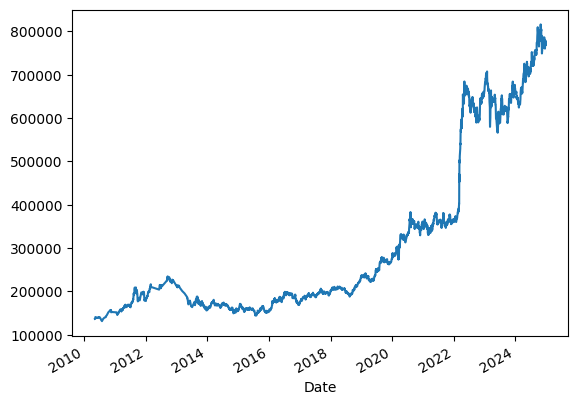

In [6]:
temp = df['Exchange Rate']
temp.plot()

In [7]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [8]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((3073, 5, 1), (3073,))

In [9]:
X_train1, y_train1 = X1[:2500], y1[:2500]
X_val1, y_val1 = X1[2500:2750], y1[2500:2750]
X_test1, y_test1 = X1[2750:], y1[2750:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((2500, 5, 1), (2500,), (250, 5, 1), (250,), (323, 5, 1), (323,))

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
cp1 = ModelCheckpoint('model1/model1.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [13]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 155852128256.0000 - root_mean_squared_error: 394584.2188 - val_loss: 28955373568.0000 - val_root_mean_squared_error: 170162.7812
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 157346693120.0000 - root_mean_squared_error: 396431.9062 - val_loss: 28955303936.0000 - val_root_mean_squared_error: 170162.5781
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 166865453056.0000 - root_mean_squared_error: 408418.4688 - val_loss: 28955228160.0000 - val_root_mean_squared_error: 170162.3594
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 163517906944.0000 - root_mean_squared_error: 404323.5938 - val_loss: 28955150336.0000 - val_root_mean_squared_error: 170162.1250
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 165904285696.0000 - root_mean_squared_error: 407260.0938 - val_loss: 28955066368.0000 - val_root_mean_squared_error: 170161.8906
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 165631

In [14]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/model1.keras')

In [15]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


,Train Predictions,Actuals
0,2.186604,760126.4750
1,2.186604,760289.8220
2,2.186604,770447.0764
3,2.186604,772684.3983
4,2.186604,769980.1445
...,...,...
2495,2.186604,169114.0428
2496,2.186604,169150.5976
2497,2.186604,170704.3647
2498,2.186604,170816.3153


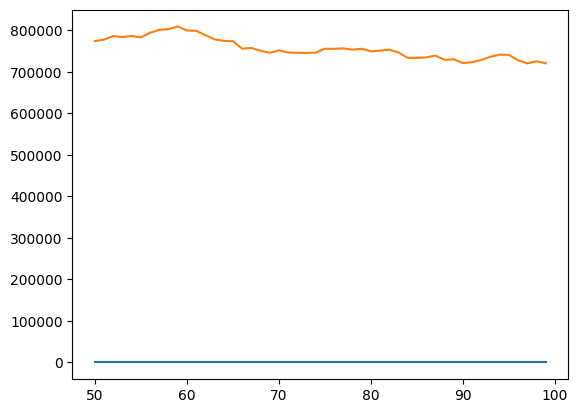

In [16]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [17]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Val Predictions,Actuals
0,2.186604,170145.1520
1,2.186604,170132.9768
2,2.186604,171123.2506
3,2.186604,170168.5018
4,2.186604,167936.2592
...,...,...
245,2.186604,171118.2579
246,2.186604,173007.9400
247,2.186604,172099.9000
248,2.186604,174574.1388


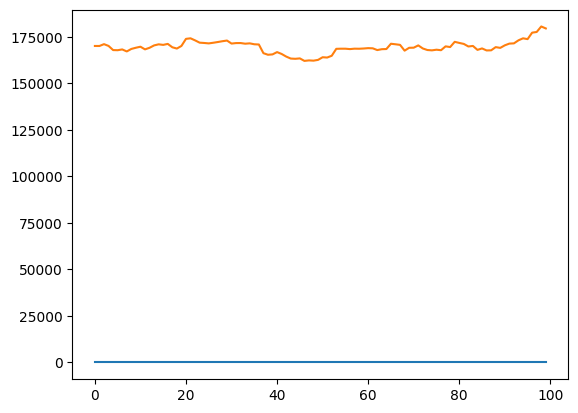

In [18]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [19]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Test Predictions,Actuals
0,2.186604,174680.7692
1,2.186604,174625.9620
2,2.186604,163680.3517
3,2.186604,165775.0983
4,2.186604,165815.3014
...,...,...
318,2.186604,140514.5200
319,2.186604,140790.1394
320,2.186604,139577.2499
321,2.186604,136684.5647


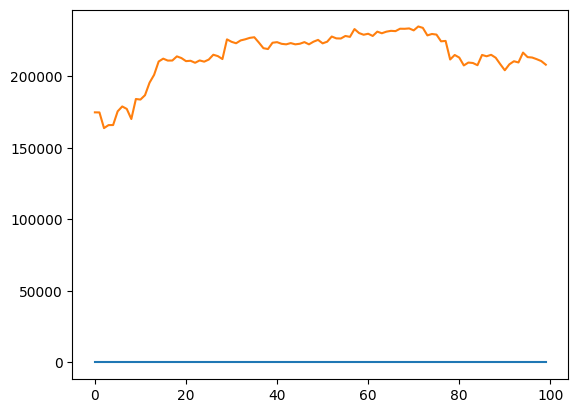

In [20]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [ ]:
# Split

In [21]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(predictions, y)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(     Predictions      Actuals
 0       2.186604  174680.7692
 1       2.186604  174625.9620
 2       2.186604  163680.3517
 3       2.186604  165775.0983
 4       2.186604  165815.3014
 ..           ...          ...
 318     2.186604  140514.5200
 319     2.186604  140790.1394
 320     2.186604  139577.2499
 321     2.186604  136684.5647
 322     2.186604  136459.7395
 
 [323 rows x 2 columns],
 35138404193.47389)

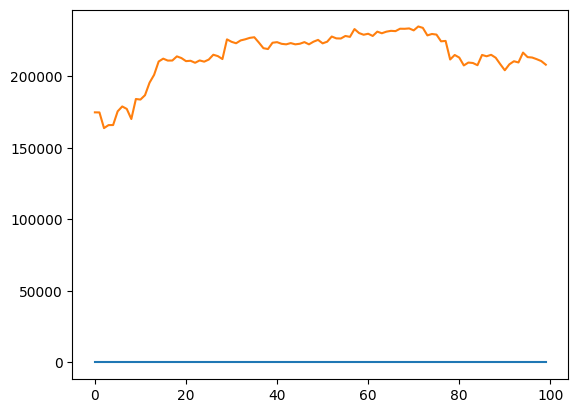

In [22]:
plot_predictions1(model1, X_test1, y_test1)

In [23]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2, activation='relu'))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 4, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │           2,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,257 (8.82 KB)

 Trainable params: 2,257 (8.82 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
cp2 = ModelCheckpoint('model2/model2.keras', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [25]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 113860812800.0000 - root_mean_squared_error: 337066.6562 - val_loss: 11342066688.0000 - val_root_mean_squared_error: 106499.1406
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 49252659200.0000 - root_mean_squared_error: 221693.8438 - val_loss: 3895458048.0000 - val_root_mean_squared_error: 62413.6055
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15391418368.0000 - root_mean_squared_error: 123454.3281 - val_loss: 632601088.0000 - val_root_mean_squared_error: 25151.5625
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2200569344.0000 - root_mean_squared_error: 46438.3867 - val_loss: 50111240.0000 - val_root_mean_squared_error: 7078.9292
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 171150128.0000 - root_mean_squared_error: 12986.5674 - val_loss: 8423100.0000 - val_root_mean_squared_error: 2902.2578
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 56072776.0000 - root_mean_square

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


(       Predictions      Actuals
 0    172878.390625  174680.7692
 1    173551.312500  174625.9620
 2    173940.937500  163680.3517
 3    172944.984375  165775.0983
 4    170342.890625  165815.3014
 ..             ...          ...
 318  138990.671875  140514.5200
 319  138978.859375  140790.1394
 320  139463.390625  139577.2499
 321  139494.578125  136684.5647
 322  139170.031250  136459.7395
 
 [323 rows x 2 columns],
 24327323.991681345)

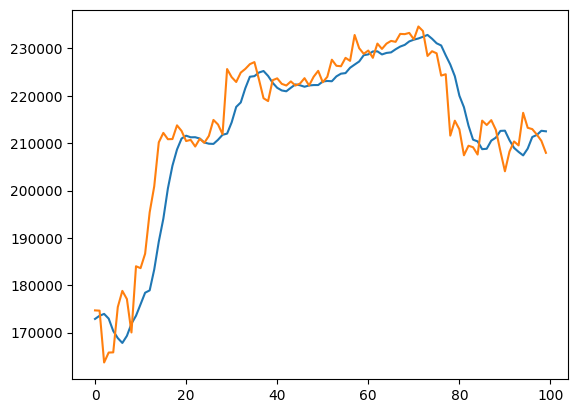

In [26]:
plot_predictions1(model2, X_test1, y_test1)

In [27]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 64)                  │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,393 (52.32 KB)

 Trainable params: 13,393 (52.32 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
cp3 = ModelCheckpoint('model3/model3.keras', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [29]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 164751163392.0000 - root_mean_squared_error: 405854.4375 - val_loss: 28955535360.0000 - val_root_mean_squared_error: 170163.2656
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 166236962816.0000 - root_mean_squared_error: 407681.8125 - val_loss: 28955361280.0000 - val_root_mean_squared_error: 170162.7500
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 166133825536.0000 - root_mean_squared_error: 407546.8125 - val_loss: 28955181056.0000 - val_root_mean_squared_error: 170162.2188
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 168469135360.0000 - root_mean_squared_error: 410368.4688 - val_loss: 28954988544.0000 - val_root_mean_squared_error: 170161.6562
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 172644040704.0000 - root_mean_squared_error: 415451.2812 - val_loss: 28954789888.0000 - val_root_mean_squared_error: 170161.0781
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 164240

In [30]:
temp

,Exchange Rate
Date,
2024-12-30,768331.1874
2024-12-27,774237.5461
2024-12-26,778557.7168
2024-12-24,773996.5414
2024-12-23,769713.5684
...,...
2010-05-14,140514.5200
2010-05-13,140790.1394
2010-05-12,139577.2499


In [31]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date,,
2024-12-30,768331.1874,1.735517e+09
2024-12-27,774237.5461,1.735258e+09
2024-12-26,778557.7168,1.735171e+09
2024-12-24,773996.5414,1.734998e+09
2024-12-23,769713.5684,1.734912e+09
...,...,...
2010-05-14,140514.5200,1.273795e+09
2010-05-13,140790.1394,1.273709e+09
2010-05-12,139577.2499,1.273622e+09


In [ ]:
day = 24*60*60
year = (365.2425)*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,1.483215e+09,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,1.483219e+09,-0.675590,0.737277,0.008334,0.999965


In [ ]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,-0.675590,0.737277,0.008334,0.999965


In [ ]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((70085, 6, 5), (70085,))

In [ ]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

In [ ]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [ ]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.04009706e+00, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01],
        [ 5.37051663e-01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01]],

       [[ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
  

In [ ]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

(      Predictions  Actuals
 0        1.270767    13.46
 1        1.065866    12.93
 2        0.886102    12.43
 3        0.762327    12.17
 4        0.687246    11.55
 ...           ...      ...
 5080    -0.123489    -0.98
 5081    -0.125271    -1.40
 5082    -0.130911    -2.75
 5083    -0.147739    -2.89
 5084    -0.161792    -3.93
 
 [5085 rows x 2 columns], 184.3117044089246)

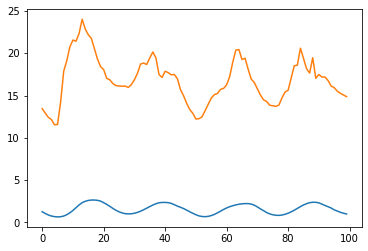

In [ ]:
plot_predictions1(model4, X2_test, y2_test)

In [ ]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2016-12-31 19:10:00,1002.18,-0.98,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,1001.40,-1.40,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,1001.19,-2.75,-0.675590,0.737277,0.008334,0.999965


In [ ]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((70084, 7, 6), (70084, 2))

In [ ]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

In [ ]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3
  return X

def preprocess_output(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [ ]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

array([[[-1.07355644e+00,  1.04009390e+00, -9.65925826e-01,
          2.58819045e-01,  5.22877889e-01, -8.52407598e-01],
        [-1.00807435e+00,  9.90728707e-01, -8.66025404e-01,
          5.00000000e-01,  5.22266764e-01, -8.52782169e-01],
        [-9.51080673e-01,  8.49685305e-01, -7.07106781e-01,
          7.07106781e-01,  5.21655371e-01, -8.53156301e-01],
        ...,
        [-8.80748054e-01,  6.66328883e-01, -2.58819045e-01,
          9.65925826e-01,  5.20431780e-01, -8.53903251e-01],
        [-8.29817537e-01,  5.37039098e-01, -7.16474371e-12,
          1.00000000e+00,  5.19819584e-01, -8.54276068e-01],
        [-8.01927015e-01,  4.74744929e-01,  2.58819045e-01,
          9.65925826e-01,  5.19207120e-01, -8.54648446e-01]],

       [[-1.00807435e+00,  9.90728707e-01, -8.66025404e-01,
          5.00000000e-01,  5.22266764e-01, -8.52782169e-01],
        [-9.51080673e-01,  8.49685305e-01, -7.07106781e-01,
          7.07106781e-01,  5.21655371e-01, -8.53156301e-01],
        [-9.14701

In [ ]:
preprocess_output(y3_train)
preprocess_output(y3_val)
preprocess_output(y3_test)

array([[-0.7934386 ,  0.41245076],
       [-0.76312281,  0.35368268],
       [-0.72189335,  0.32312327],
       ...,
       [ 1.48145784, -1.43051636],
       [ 1.41597574, -1.44697142],
       [ 1.35049365, -1.56920903]])

In [ ]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 64)                18176     
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 18        
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
 375/1875 [=====>........................] - ETA: 8s - loss: 0.0713 - root_mean_squared_error: 0.2670

KeyboardInterrupt: ignored

In [ ]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.497261,0.412451,-0.939157,-0.793439
1,0.473668,0.353683,-0.892772,-0.763123
2,0.458037,0.323123,-0.859892,-0.721893
3,0.467024,0.250251,-0.840133,-0.652773
4,0.488601,0.254952,-0.823547,-0.652773
...,...,...,...,...
5079,-0.917703,-1.222477,1.712903,1.601508
5080,-0.988455,-1.271843,1.652463,1.506923
5081,-1.087464,-1.430516,1.593468,1.481458
5082,-1.219868,-1.446971,1.541024,1.415976


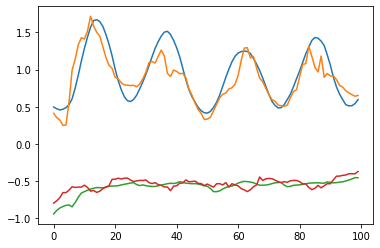

In [ ]:
plot_predictions2(model5, X3_test, y3_test)

In [ ]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

In [ ]:
def get_predictions_postprocessed(model, X, y):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
  p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  return df

In [ ]:
post_processed_df = get_predictions_postprocessed(model5, X3_test, y3_test)
post_processed_df

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,13.651567,12.93,981.228333,982.43
1,13.450840,12.43,981.610901,982.68
2,13.317848,12.17,981.882019,983.02
3,13.394308,11.55,982.044983,983.59
4,13.577888,11.59,982.181763,983.59
...,...,...,...,...
5079,1.613030,-0.98,1003.098633,1002.18
5080,1.011069,-1.40,1002.600220,1001.40
5081,0.168693,-2.75,1002.113708,1001.19
5082,-0.957798,-2.89,1001.681274,1000.65


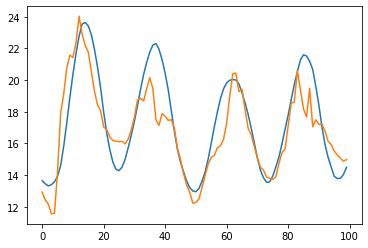

In [ ]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])

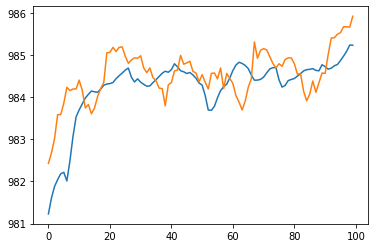

In [ ]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])

In [ ]:
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(16))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 7, 32)             4992      
_________________________________________________________________
lstm_5 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 18        
Total params: 8,282
Trainable params: 8,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp6])

Epoch 1/10
 131/1875 [=>............................] - ETA: 12s - loss: 0.8951 - root_mean_squared_error: 0.9461

KeyboardInterrupt: ignored

In [ ]:
model7 = Sequential()
model7.add(InputLayer((7, 6)))
model7.add(Conv1D(64, kernel_size=2, activation='relu'))
model7.add(Flatten())
model7.add(Dense(8, 'relu'))
model7.add(Dense(2, 'linear'))
model7.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 6, 64)             832       
_________________________________________________________________
flatten_3 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 3080      
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 18        
Total params: 3,930
Trainable params: 3,930
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp7 = ModelCheckpoint('model6/', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp7])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0984 - root_mean_squared_error: 0.3136 - val_loss: 0.0216 - val_root_mean_squared_error: 0.1471
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0143 - root_mean_squared_error: 0.1196 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0988
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0092 - root_mean_squared_error: 0.0959 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0849
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0076 - root_mean_squared_error: 0.0873 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0770
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0069 - root_mean_squared_error: 0.0828 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0734
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0064 - root_mean_squared_error: 0.0800 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0710
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0061 - root_mean_squared_error: 0.0782 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0687
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0059 - root_mean_squared_error: 0.0768 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0689
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0057 - root_mean_squared_error: 0.0757 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0670
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0056 - root_mean_squared_error: 0.0749 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0661
INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets
